# <strong>Recurrent Neural Networks Using Pytorch</strong>

### In this notebook you will learn the basics of a Recurrent Neural Network using the python library Pytorch.
---
### <strong>Table of Contents</strong>
1. [Introduction to Recurrent Neural Networks](#intro)
2. [Long-Short Term Memory](#LSTM)
3. [Time Series Data](#time)
4. [Understanding the Dataset](#data)
5. [Using Pytorch](#pytorch)
6. [Code](#code)
---
### By the end of this notebook, you should be able to implement a basic RNN using Pytorch with the provided data set.


---
## <a name="intro"></a> <strong>Introduction</strong>
---
*<strong>Recurrent neural networks</strong>*, or RNNs, are widely used in a variety of mediums. RNNs leverage sequential data to make predictions. **Sequential memory** makes it easier for the neural network to recognize patterns and replicate the input. In order to achieve learning through sequential memory, a **feedforward neural network** with looping mechanisms is implemented. 

As the image below outlines, there are *three* layers: **input, hidden and output**. There are loops that pass previous information forward, allowing the model to *sequentially* store and learn the data. The complexity of a hidden state is based on how much “historic” information is being stored, it is a representation of all previous steps. When training a model, once there is a prediction from a given output, a **loss function** is used to determine the error between the predicted output and real output. The model is trained through back propagation. The weight of each node in the neural network is adjusted with their corresponding gradient that is calculated during **back propagation**. 
<br>
<br>
<p align="center">
  <img src="images/rnnImg.png">
</p>
<br>
<br>

The advantage of using sequential data to successfully predict certain outcomes is especially relevant when analyzing **time series data**. 

---
## <a name="LSTM"></a><strong>Long-Short Term Memory</strong>
---
["Learning to store information over extended time intervals by recurrent backpropagation takes a very long time, mostly because of insufficient, decaying error backflow".*](https://ieeexplore.ieee.org/abstract/document/6795963) 

To solve this issue a type of RNN called **long short term memory** is used. [**LSTMs**](https://developer.ibm.com/tutorials/iot-deep-learning-anomaly-detection-1/) are able to keep track of long term dependencies by using gradients to modify the model, rather than backpropogations. These attributes are especially advantageous when examining **time series data**. The more historical data there is, the better the model can train, producing the most accurate outputs. 

An LSTM has an internal state variable that is modified based on weights and biases through operation gates. Traditionally, an LSTM is comprised of three operation gates: the forget gate, input gate, and output gate. The architecture of long short term memory is dependent on $tanh$ and $sigmoid$ functions implemented in the network. The $tahn$ function ensures that the values in the network remain between -1 and 1 while the $sigmoid$ function regulates if data should be remembered or forgotten. Furthermore, 

The mathematical representations of each gate are as follows:

<strong>Forget Gate</strong>: $$f_t = \sigma(w_f*[h_{t-1},x_t] + b_f)$$

<strong>Input Gate</strong>: $$i_t = \sigma(w_f*[h_{t-1},x_t] + b_i)$$

<strong>Output Gate</strong>: $$O_t = \sigma(w_f*[h_{t-1},x_t] + b_o)$$

Where:  
* $w_f$ = weight matrix between forget and input gate
* $h_{t-1}$ = previous hidden state
* $x_t$ = input
* $b_f$ = connection bias at forget gate 
* $b_i$ = connection bias at input gate 
* $b_o$ = connection bias at output gate 


Each gate modifies the input a different way. The forget gate determines what data is relevant to keep and what information can be "forgotten". The input gate analyzes what information needs to be added to the current step, and the output gate finalizes the proceeding hidden state. Each of these gates allows for sequential data to be efficiently stored and analyzed, allowing for an accurate predictive model to be developed. 

***Source:** *S. Hochreiter and J. Schmidhuber, "Long Short-Term Memory," in Neural Computation, vol. 9, no. 8, pp. 1735-1780, 15 Nov. 1997, doi: 10.1162/neco.1997.9.8.1735.*

---
## <a name="time"></a><strong>Time Series Data</strong>
---
Prior to training a model, it is important to understand the type of data you are working with. There are many different types of data, this notebook incorporates time series data. In essence, time series data is a collection of chronologically collected observations made over a period of time- sometimes during specific intervals. Time series data can be grouped as either *<strong>metrics</strong>* or *<strong>events</strong>*. 

* **Metrics**: measurements taken at regular intervals.

* **Events**: measurements taken at irregular intervals. 

Distinguishing if the data is comprised of metrics or events is critical. Events are not condusive for creating predictive models. The irregular intervals between each data point prevents sequential logic from creating patterns on past behavior. In contrast, the characteristic regularity between each metric allows machine learing models to learn from previous data and construct possible outcomes for the future. Creating an RNN using time series data, specifically metrics, is a great way to take advantage of the sequential learning pattern they leverage. 

Furthermore, time series data can also be categorized as *<strong>linear</strong>* or *<strong>non-linear</strong>*. Based on the mathematical relationship created by the model, the data is classified as one or the other.

Popular examples of time series data include weather, stock, and health care data. In this notebook, we will be using stock data to create an RNN model to predict the value of the given stock. 



---
## <a name="data"></a><strong>Understanding the Dataset</strong>
---

The data set we are examining has been collected by IBM Watson. It is comprised of the Open, High, Low and Close values of a particular stock from the years 1980-2018. Later in the tutorial, we will extract information about the data's characteristics using certain Pandas methods, however, let us focus on identifying what we want to do with the data first. 

When describing a stocks value on any given day, the close value is used. Financial institutions also examine close values to analyze a stock's market performance as it represents how the stock performed through market hours. The overall importance of the Close value indicates to us that this is the value that we should train the model to predict. 

In this tutorial, we will be using all four data fields to create a multivariate model that can precit the Close Value for this stock. 


---
## <a name="pytorch"></a><strong>Using Pytorch</strong>
---
Pytorch is a python library that uses the specialized data structure Tensors to encode model parameters and inputs. The following is a brief tutorial on imports that we will be using to evaluate the stock data. 


In order to use Pytorch, we must first import the library into our workspace. To do this type the following code...

In [2]:
import torch

In order to be able to work with data and create a neural network, we can use the Pytorch class nn and the primatives DataLoader and datasets. Dataset is meant to wrap an iterable around the dataset while DataLoader is meant to load and store the desired data. The matplotlib import allows us to change, create and plot a figure in a plotting area. This is useful for the model we are trying to create in this exercise. 

In [3]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Now that we know what imports to use, we are ready to begin creating our model for our stock data set!

---
## <a name="code"></a><strong>Code</strong>
---

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

!pip install pandas
import pandas as pd 

In the following empty code cell, import the Stock Data CSV file to your notebook. 

In [ ]:
#insert stock data import here, follow the directions outlined in the article.

First, let us examine the data.

In [8]:
stock_data = pd.read_csv(body)
print("Information about the dataset", end = "\n")
print(stock_data.info())

Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9400 non-null   int64  
 1   Date        9400 non-null   object 
 2   Open        9400 non-null   float64
 3   High        9400 non-null   float64
 4   Low         9400 non-null   float64
 5   Close       9400 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 440.8+ KB
None


We can see that there are a total of 6 columns, the columns we want to input into the model are the last four columns: index 2-5.

In [9]:
print("First five elements in the dataset", end = "\n")
print(stock_data.head(5))
print("Last five elements in the dataset", end = "\n")
print(stock_data.tail(5))

First five elements in the dataset
   Unnamed: 0        Date    Open    High     Low    Close
0           0  2018-03-27  173.68  175.15  166.92  168.340
1           1  2018-03-26  168.07  173.10  166.44  172.770
2           2  2018-03-23  168.39  169.92  164.94  164.940
3           3  2018-03-22  170.00  172.68  168.60  168.845
4           4  2018-03-21  175.04  175.09  171.26  171.270
Last five elements in the dataset
      Unnamed: 0        Date   Open   High    Low  Close
9395        9395  1980-12-18  26.63  26.75  26.63  26.63
9396        9396  1980-12-17  25.87  26.00  25.87  25.87
9397        9397  1980-12-16  25.37  25.37  25.25  25.25
9398        9398  1980-12-15  27.38  27.38  27.25  27.25
9399        9399  1980-12-12  28.75  28.87  28.75  28.75


By printing the first and last 5 elements, we can see that the data is in inverse order. The most recent data stored at the beginning of the set and the oldest data is at the end. For our model, we need to input the data from oldest to most recent. The Pandas method "sort_values" can be used to sort the data in chronological order.

In [10]:
stock_data = stock_data.sort_values(by="Date")
print(stock_data.head())

      Unnamed: 0        Date   Open   High    Low  Close
9399        9399  1980-12-12  28.75  28.87  28.75  28.75
9398        9398  1980-12-15  27.38  27.38  27.25  27.25
9397        9397  1980-12-16  25.37  25.37  25.25  25.25
9396        9396  1980-12-17  25.87  26.00  25.87  25.87
9395        9395  1980-12-18  26.63  26.75  26.63  26.63


After applying the "sort_values" method, we can use the "head" method to print the first five data points. Our data is now in the correct order.  

In [11]:
from sklearn.preprocessing import MinMaxScaler
price = stock_data[['High','Low','Open','Close']]
print(price[:5])

       High    Low   Open  Close
9399  28.87  28.75  28.75  28.75
9398  27.38  27.25  27.38  27.25
9397  25.37  25.25  25.37  25.25
9396  26.00  25.87  25.87  25.87
9395  26.75  26.63  26.63  26.63


In order to create the multivariate model we can create an array containing only the variables we want to input. We no longer need the date or index column as the data has already been ordered.

In [12]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price = scaler.fit_transform(price.values)
print(price[:5])

[[-0.94884358 -0.94844388 -0.94899391 -0.94863261]
 [-0.95313783 -0.95280073 -0.95295751 -0.95297352]
 [-0.95893076 -0.95860987 -0.95877273 -0.95876139]
 [-0.95711507 -0.95680904 -0.95732616 -0.95696715]
 [-0.95495353 -0.95460157 -0.95512737 -0.95476776]]


After we have isolated the target variables, the next step is to normalize the values. This means, representing them as a value between -1 and 1. This allows us to make the data uniform. This means, irrespective of the range it falls under, each data point will have the same impact on the model. 

Below, we have defined our train window as 7 to represent the length of a week. 

In [13]:
train_window = 7 
import numpy as np
def create_inout_sequences(input, tw):
    inout_seq = []
    L = len(input)
    print('Length = ',L)
    for i in range(L-tw):
        data_seq = input[i:i+tw]
        data_label = input[i+tw:i+tw+1][0][3]
        inout_seq.append((data_seq ,data_label))
    
    data = inout_seq;
    print('size of data : ', len(data))
    test_set_size = 20
    train_set_size = len(data) - (test_set_size);
    print('size of test : ', test_set_size)
    print('size of train : ', train_set_size)
    
    train = data[:train_set_size]
    test = data[train_set_size:]
  
    return train,test
    

train,test = create_inout_sequences(price, train_window )


Length =  9400
size of data :  9393
size of test :  20
size of train :  9373


The "create_intout_sequences" method creates labels for the dataset and isolates the datapoints we are inputting into the model, taking into account the training and test size.  

Let us print the first five elements of the train data to confirm its formatting.

In [16]:
print(train[:5])

[(array([[-0.94884358, -0.94844388, -0.94899391, -0.94863261],
       [-0.95313783, -0.95280073, -0.95295751, -0.95297352],
       [-0.95893076, -0.95860987, -0.95877273, -0.95876139],
       [-0.95711507, -0.95680904, -0.95732616, -0.95696715],
       [-0.95495353, -0.95460157, -0.95512737, -0.95476776],
       [-0.95025578, -0.94989616, -0.95044048, -0.95007958],
       [-0.94630737, -0.94588785, -0.94644795, -0.94608595]]), -0.942468528432933), (array([[-0.95313783, -0.95280073, -0.95295751, -0.95297352],
       [-0.95893076, -0.95860987, -0.95877273, -0.95876139],
       [-0.95711507, -0.95680904, -0.95732616, -0.95696715],
       [-0.95495353, -0.95460157, -0.95512737, -0.95476776],
       [-0.95025578, -0.94989616, -0.95044048, -0.95007958],
       [-0.94630737, -0.94588785, -0.94644795, -0.94608595],
       [-0.94270481, -0.94225714, -0.94283152, -0.94246853]]), -0.9377803501664015), (array([[-0.95893076, -0.95860987, -0.95877273, -0.95876139],
       [-0.95711507, -0.95680904, 

We can see the data type of the train data is an array, and the data is all normalized. 

This is the LSTM method. The number of inputs included in the model is 4 to represent the Open, High, Low and Close values we are feeding into the model.

In [14]:
class LSTM(nn.Module):
    def __init__(self, input_size=4, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]


In [ ]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

We must define an LSTM() method object and the loss function and optimizer so that we can use it when we train the model. 

Now that all the necessary parameters have been defined, we can use the "LSTM()" and "create_inout_sequence()" to train the model. We are training this model to 5 epochs. 

In [17]:
epochs = 5
for i in range(epochs):
    for seq, labels in train:
        seq = torch.from_numpy(np.array(seq)).type(torch.Tensor)
        #print(seq)
        labels = torch.from_numpy(np.array(labels)).type(torch.Tensor)
        #print(labels)
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)
        #print('y_pred : ',y_pred)
        labels = labels.view(1)
        #print('label : ', labels)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   0 loss: 0.0000961420
epoch:   1 loss: 0.0001477744
epoch:   2 loss: 0.0004332946
epoch:   3 loss: 0.0006641640
epoch:   4 loss: 0.0005468744


The following method allows us to predict the values using the trained model. 

In [18]:
model.eval()
actual=[]
pred = []
#for i in range(fut_pred):
if True: 
    #seq = test_inout_seq
    for seq, labels in test:
        seq = torch.from_numpy(np.array(seq)).type(torch.Tensor)
        #print(seq)
        labels = torch.from_numpy(np.array(labels)).type(torch.Tensor)
        actual.append(labels)
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
            pred.append(model(seq).item())

Next, our aim is to convert the predicted and actual data into tensors. 

In [19]:
pred = torch.from_numpy(np.array(pred)).type(torch.Tensor)
actual = torch.from_numpy(np.array(actual)).type(torch.Tensor)

We can print the data to confirm that this it is formatted with the correct data type. 

In [20]:
print(pred)
print(actual)

tensor([-0.5286, -0.5288, -0.5339, -0.5350, -0.5318, -0.5312, -0.5353, -0.5312,
        -0.5282, -0.5248, -0.5260, -0.5291, -0.5284, -0.5301, -0.5340, -0.5328,
        -0.5385, -0.5416, -0.5464, -0.5384])
tensor([-0.5164, -0.5254, -0.5219, -0.5201, -0.5206, -0.5253, -0.5198, -0.5110,
        -0.5059, -0.5110, -0.5154, -0.5148, -0.5167, -0.5245, -0.5247, -0.5362,
        -0.5432, -0.5545, -0.5318, -0.5447])


There are 20 individual tensors in both the predicted and actual sets. As we recall, previously, we defined the variable "test_set_size" as 20 in the "create_inout_sequence" method. These values represent the predicted and actual Close Values for the last (most recent) 20 days.  

Finally, in order for us to better understand and analyze the accuracy of the model's predictive values, we need to convert the normalized values into thier scalar form. 

In [21]:
import numpy as np
pred_new = scaler.inverse_transform( np.c_[ np.zeros(20),np.zeros(20),np.zeros(20),np.array(pred)])
print(pred_new[:,3])

[173.89800357 173.83244528 172.07629451 171.68177076 172.77959927
 172.98811707 171.57761484 173.00525326 174.04557667 175.21893213
 174.7752654  173.72557064 173.95622955 173.38208472 172.01048906
 172.42880164 170.47941559 169.40720898 167.7434536  170.51992868]


In [22]:
actual_new = scaler.inverse_transform( np.c_[ np.zeros(20),np.zeros(20),np.zeros(20),np.array(actual)])
print(actual_new[:,3])

[178.11999474 174.99999256 176.21000958 176.81999212 176.67000924
 175.03000149 176.94000725 179.97999249 181.71999569 179.97000324
 178.44000078 178.65000152 178.0199993  175.2999995  175.24000223
 171.27000783 168.84501005 164.93999725 172.77000135 168.34000729]


It is clear that the model did a good job of predicting the Close Value of the stock. We can represent these values visually to see how close they are

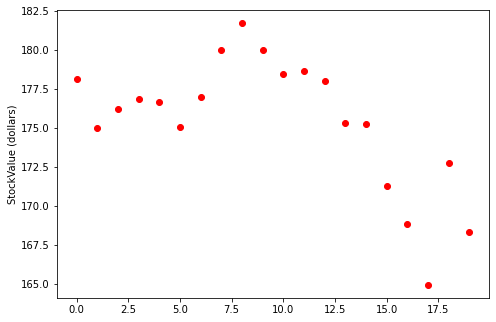

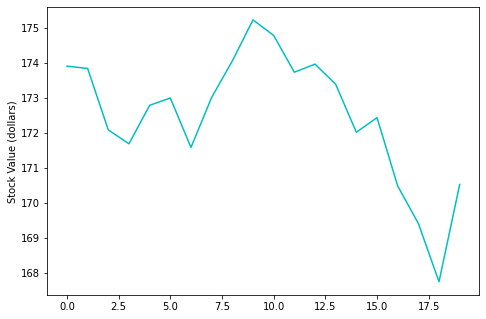

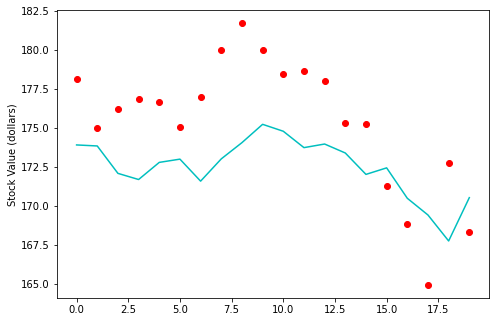

In [31]:
    fig = plt.figure()
    fig2 = plt.figure()
    fig3 = plt.figure()
    a = fig.add_axes([0,0,1,1])
    b = fig2.add_axes([0,0,1,1])
    c = fig3.add_axes([0,0,1,1])

    a.plot(actual_new[:,3], 'ro')
    a.set_ylabel('Stock Value (dollars)')
  
    b.plot(pred_new[:,3],'c')
    b.set_ylabel('Stock Value (dollars)')
    #fig.legend(labels = ('Actual','Predicted'),loc='upper left')
    
    c.plot(actual_new[:,3], 'ro')
    c.plot(pred_new[:,3],'c')
    c.set_ylabel('Stock Value (dollars)')
    
    
    plt.show()

The red dots represent the Actual Value of the stock over the last 20 days, and the cayanne line represents the Predicted Value of the stock over the last 20 days. 

We can also plot the difference between the Actual and Predicted Value. 

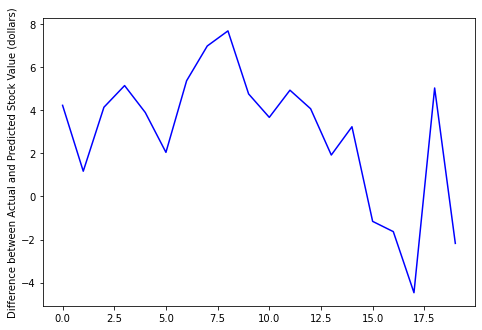

In [36]:
difference = actual_new - pred_new
fig = plt.figure()
diffGraph = fig.add_axes([0,0,1,1])
diffGraph.plot(difference[:, 3], 'b')
diffGraph.set_ylabel('Difference between Actual and Predicted Stock Value (dollars)')

plt.show()

We have successfully completed creating our RNN model to predict the stock value.

---

#### We hope this tutorial gave you a glimpse into creating a Recurrent Neural Network using PyTorch. 
#### Thanks for completing this lesson!

### <strong>Want to Learn More?</strong>

Running deep learning programs usually needs a high performance platform. **PowerAI** speeds up deep learning and AI. Built on IBM’s Power Systems, **PowerAI** is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The **PowerAI** platform supports popular machine learning libraries and dependencies including TensorFlow, Caffe, Torch, and Theano. You can use [PowerAI on IMB Cloud](https://cocl.us/ML0120EN_PAI).

Also, you can use **Watson Studio** to run these notebooks faster with bigger datasets. **Watson Studio** is IBM’s leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, **Watson Studio** enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of **Watson Studio** users today with a free account at [Watson Studio](https://cocl.us/ML0120EN_DSX). This is the end of this lesson. Thank you for reading this notebook, and good luck!

Content and model created by: [Dhivya Lakshminarayanan](https://www.linkedin.com/in/dhivya-lak/), [Samaya Madhavan](https://www.linkedin.com/in/samaya-madhavan)

Added to IBM Developer by: [Dhivya Lakshminarayanan](https://www.linkedin.com/in/dhivya-lak/)

### <strong>References</strong>

* https://pytorch.org/tutorials/beginner/basics/intro.html
* https://www.influxdata.com/what-is-time-series-data/
* https://ieeexplore.ieee.org/abstract/document/6795963
* https://www.youtube.com/watch?v=LHXXI4-IEns
* https://www.pluralsight.com/guides/introduction-to-lstm-units-in-rnn
* https://stackabuse.com/time-series-prediction-using-lstm-with-pytorch-in-python